# Visualize Samples Being Used
Compare images at the analysis resolution to the full-res originals to ensure by visual inspection that we're not losing significant information.

In [1]:
import numpy as np

import preprocessing
import h5py
import os
import torch
import paths 

import matplotlib as mpl
from matplotlib import pyplot as plt

from importlib import reload

In [10]:
dataset = 'gallearn_data_256x256_3proj_wsat_sfr_tgt.h5'

In [11]:
from importlib import reload
reload(preprocessing)

<module 'preprocessing' from '/Users/patrick/code/gallearn/GalLearn/preprocessing.py'>

In [12]:
d = preprocessing.load_data(dataset)
X_orig = d['X']
orientations = d['orientations']
X, means, stds = preprocessing.std_asinh(X_orig, return_distrib=True)
ys = d['ys_sorted']
fnames = d['file_names']
obs_names = d['obs_sorted']

0 min, 51.3 s to load


In [13]:
X.shape

torch.Size([3660, 3, 256, 256])

In [14]:
with h5py.File(os.path.join(paths.data, 'ellipses.h5')) as f:
    X_ell = torch.FloatTensor(np.array(f['X'])).permute(3, 2, 0, 1)
    ys_ell = torch.FloatTensor(np.array(f['ys_sorted'])).transpose(1, 0)

# Ellipses

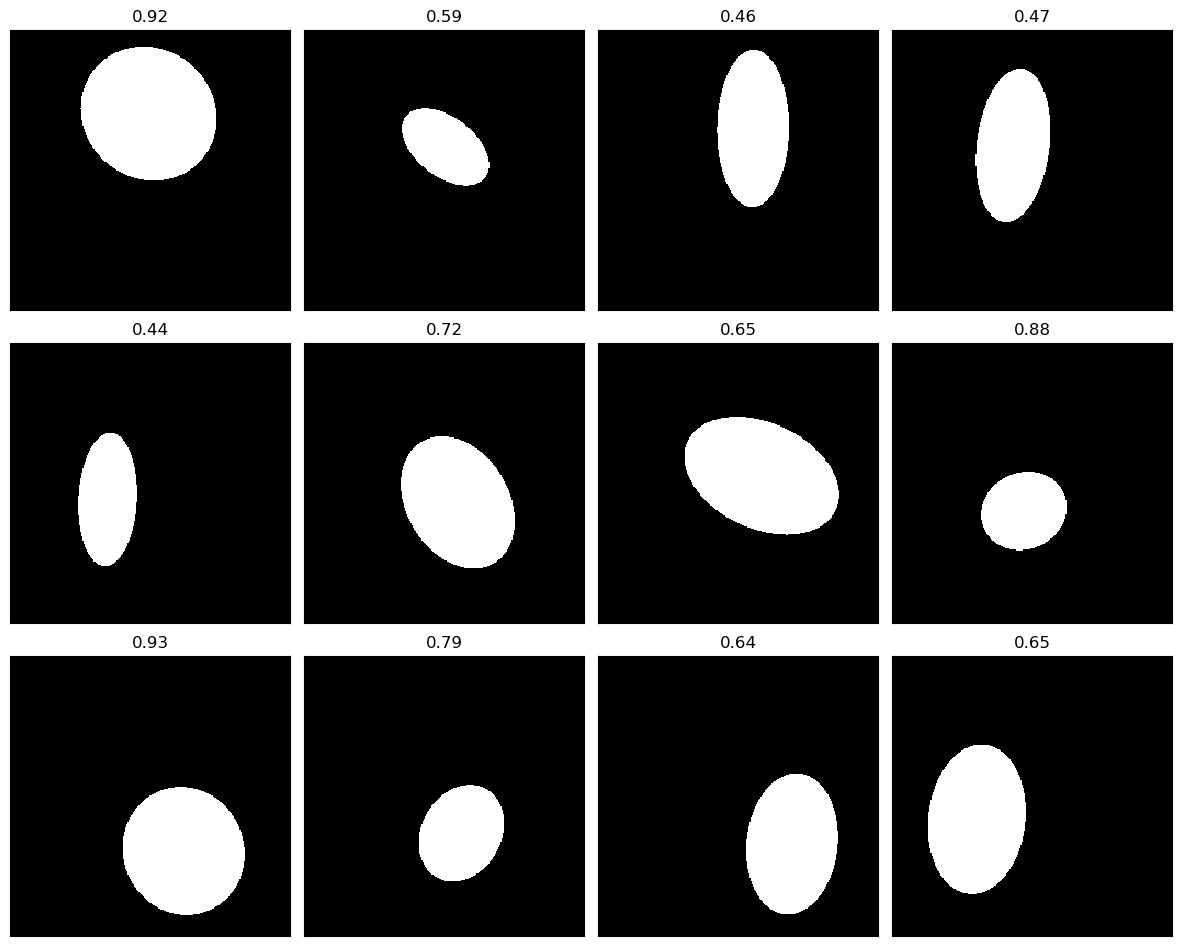

In [7]:
Nsubplots = 3 * 4
indices = np.random.randint(0, X_ell.shape[0], Nsubplots)
example_data = X_ell[indices]
example_targets = ys_ell[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
    )
    tgt_str = "{0:0.2f}"
    ax.set_title(tgt_str.format(
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.show()

## Analysis Resolution

In [8]:
indices = np.random.randint(0, X.shape[0], Nsubplots)

### Default asinh stretch

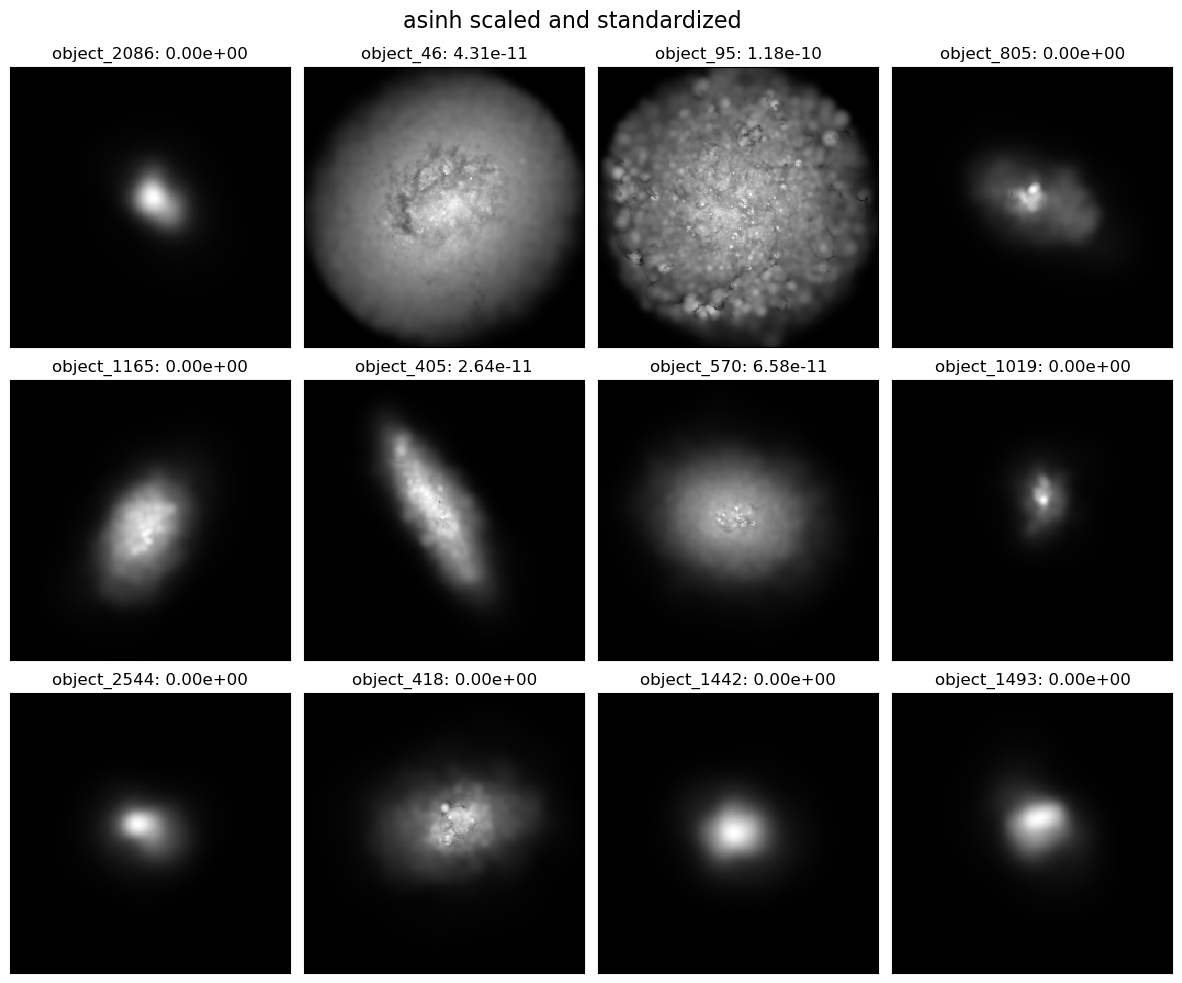

In [15]:
Nsubplots = 3 * 4
example_data = X[indices]
example_targets = ys[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
        #norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)
    )
    if '2d_tgt' in dataset:
        tgt_str = "{0}: {1:0.2f}"
    elif 'sfr' in dataset:
        tgt_str = "{0}: {1:0.2e}" 
    else:
        tgt_str = "{1:0.2f}, {2:0.2f}"
    ax.set_title(tgt_str.format(
        obs_names[indices][i],
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle('asinh scaled and standardized', y=0.92, fontsize=16)
plt.show()

### Experimenting with different stretch

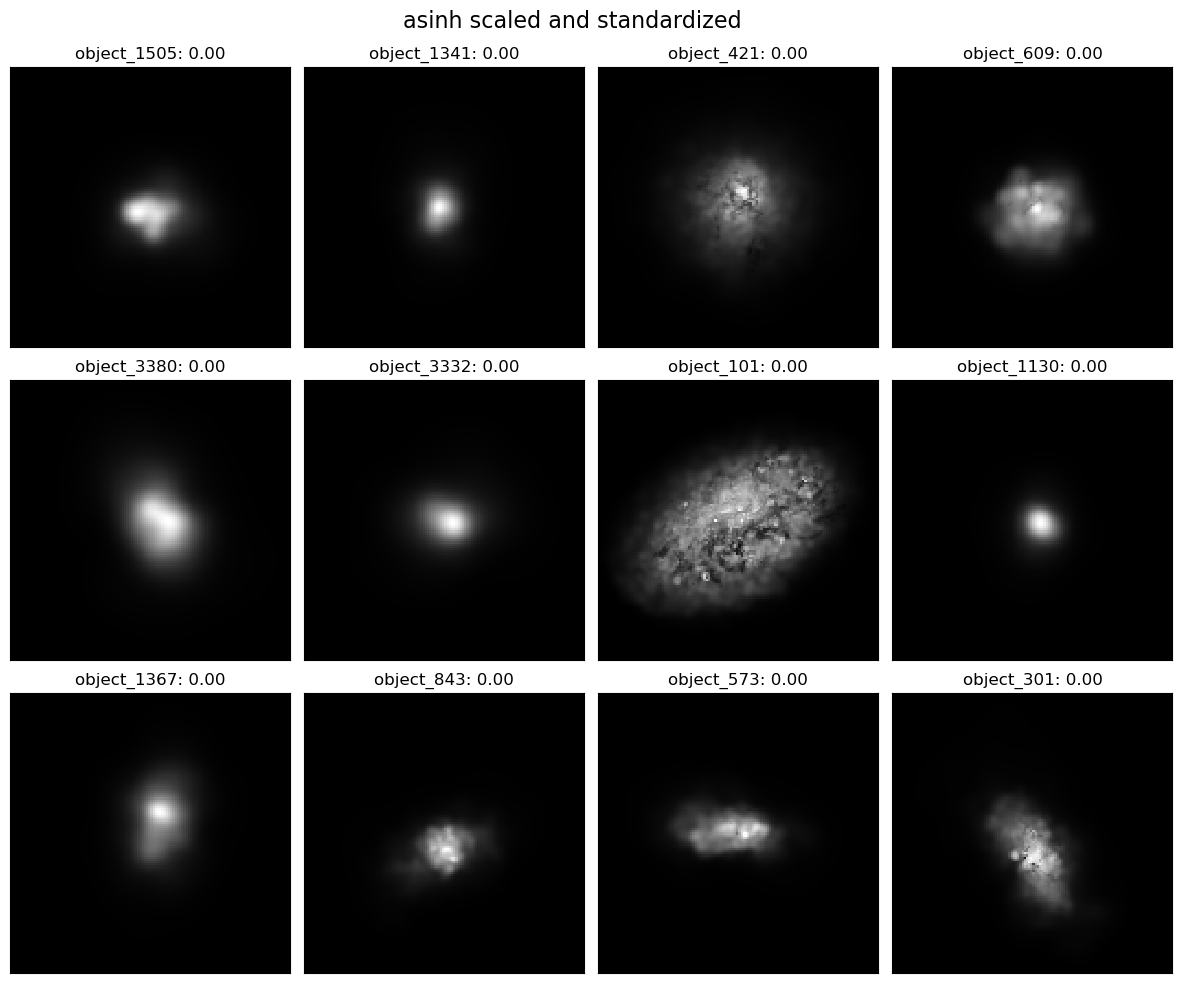

In [43]:
Nsubplots = 3 * 4
stretch = 1.e-6
example_data = preprocessing.std_asinh(X_orig, stretch)[indices]
example_targets = ys[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
        #norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)
    )
    if '2d_tgt' in dataset or 'sfr' in dataset:
        tgt_str = "{0}: {1:0.2f}"
    else:
        tgt_str = "{1:0.2f}, {2:0.2f}"
    ax.set_title(tgt_str.format(
        obs_names[indices][i],
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle('asinh scaled and standardized', y=0.92, fontsize=16)
plt.show()

### No preprocessing, log scaled image

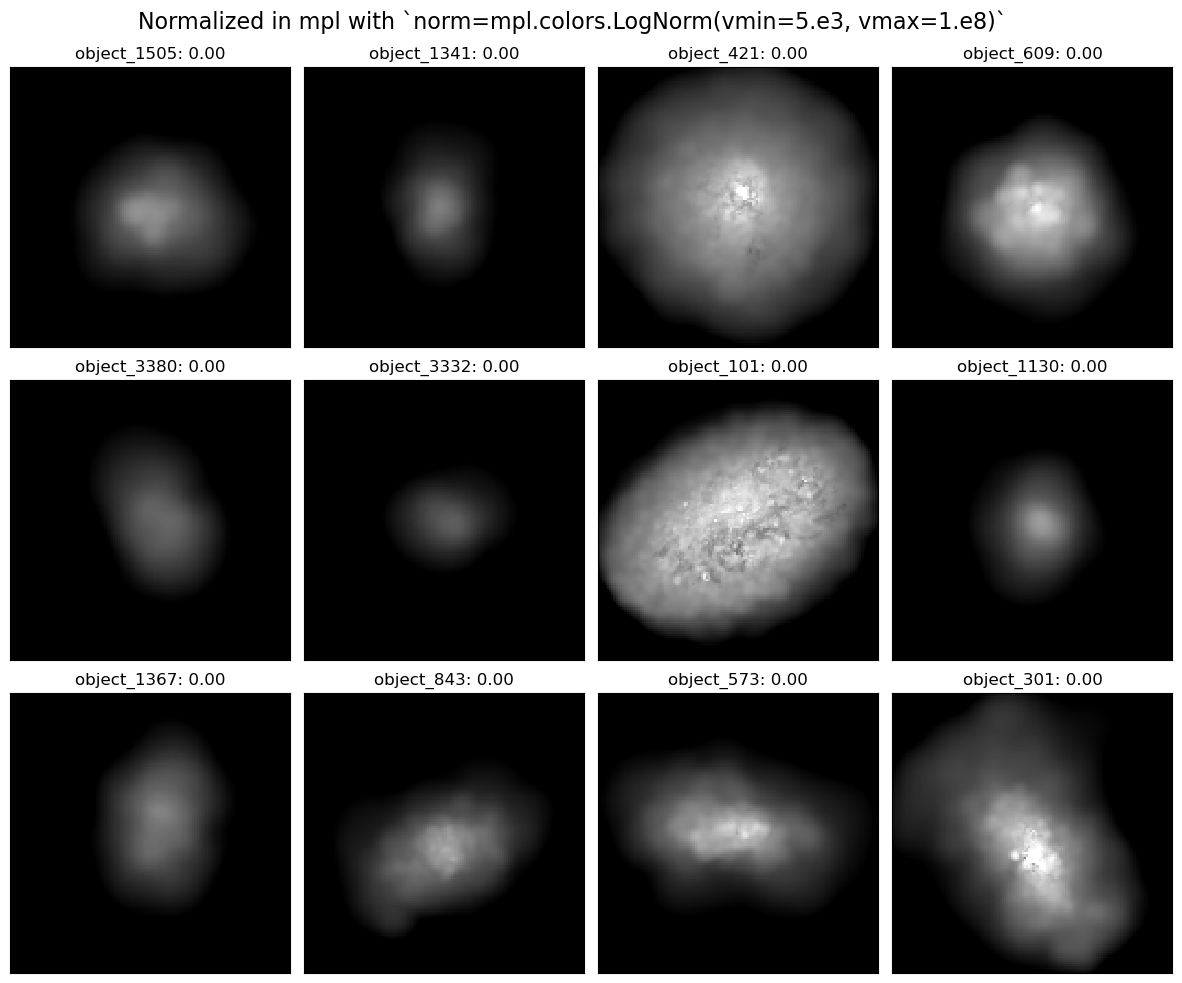

In [47]:
Nsubplots = 3 * 4
example_data = X_orig[indices]
example_targets = ys[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
        norm=mpl.colors.LogNorm(vmin=5.e3, vmax=1.e8)
    )
    if '2d_tgt' in dataset or 'sfr' in dataset:
        tgt_str = "{0}: {1:0.2f}"
    else:
        tgt_str = "{1:0.2f}, {2:0.2f}"
    ax.set_title(tgt_str.format(
        obs_names[indices][i],
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle(
    'Normalized in mpl with `norm=mpl.colors.LogNorm(vmin=5.e3, vmax=1.e8)`',
    y=0.92,
    fontsize=16
)
plt.show()

## Original Resolution

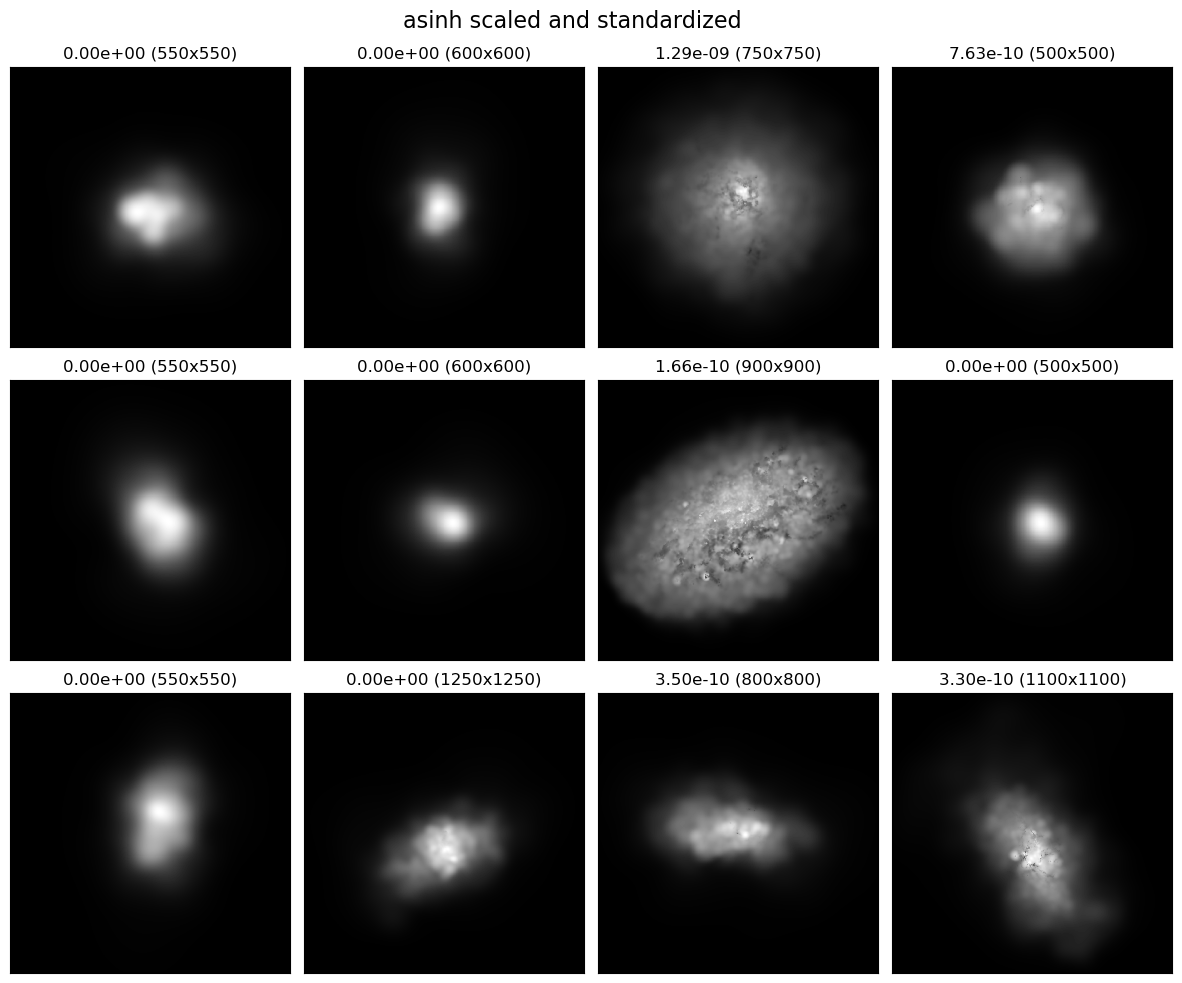

In [117]:
fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    fname = fnames[indices[i]]
    orientation = orientations[indices[i]]
    if 'sate' in fname:
        direc = '/DFS-L/DATA/cosmo/kleinca/FIREBox_Images/satellite/band_ugr'
    else:
        direc = '/DFS-L/DATA/cosmo/kleinca/FIREBox_Images/host/band_ugr'
    with h5py.File(os.path.join(direc, fname), 'r') as f:
        image = torch.FloatTensor(np.array([[f[orientation]['band_g']]]))
    image = preprocessing.std_asinh(image, means=means[0:1], stds=stds[0:1])
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        image[0, 0], 
        cmap='gray', 
        interpolation='none',
        #norm=mpl.colors.LogNorm(vmin=5.e3, vmax=1.e8)
    )
    if '2d_tgt' in dataset:
        title_str = "{0:0.2f} ({1:0.0f}x{2:0.0f})"
    elif 'sfr' in dataset:
        title_str = "{0:0.2e} ({1:0.0f}x{2:0.0f})"
    else:
        title_str = "{0:0.2f}, {1:0.2f} ({2:0.0f}x{3:0.0f})"
    ax.set_title(title_str.format(
        *example_targets[i],
        *image.shape[-2:]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle(
    'asinh scaled and standardized',
    y=0.92,
    fontsize=16
)
plt.show()